In [4]:
import pandas as pd

data = pd.read_csv('college_race_data_2010_2024.csv')
# for each college column, get difference between 2022 and 2024 rows 
# and add to new column
data["diff_black"] = (
    data.groupby("College")[["Black or African American"]].diff().fillna(0)
) 
data["diff_hispanic"] = (
    data.groupby("College")[["Hispanic"]].diff().fillna(0)
)
data["diff_asian"] = (
    data.groupby("College")[["Asian"]].diff().fillna(0)
)
data["diff_white"] = (
    data.groupby("College")[["White"]].diff().fillna(0)
)
# Calculate differences
data = data[
    data["Year"].isin([2023, 2024])
] 

In [5]:
data["diff_black_sum"] = data.groupby("College")["diff_black"].transform("sum")
data["diff_hispanic_sum"] = data.groupby("College")[
    "diff_hispanic"
].transform("sum")
data["diff_asian_sum"] = data.groupby("College")["diff_asian"].transform("sum")
data["diff_white_sum"] = data.groupby("College")["diff_white"].transform("sum")
# round all columns to 3 decimal places
for col in [
    "diff_black",
    "diff_hispanic",
    "diff_asian",
    "diff_white",
    "diff_black_sum",
    "diff_hispanic_sum",
    "diff_asian_sum",
    "diff_white_sum",
]:
    data[col] = data[col].round(3)

data[data["College"] == "Carnegie Mellon University"]

,College,Year,Asian,Black or African American,Hispanic,White,"Native Hawaiian or Other Pacific Islander, American Indian or Alaska Native",Two or more races,Unknown race and ethnicity,U.S. Nonresident,diff_black,diff_hispanic,diff_asian,diff_white,diff_black_sum,diff_hispanic_sum,diff_asian_sum,diff_white_sum
148,Carnegie Mellon University,2023,0.353,0.045,0.119,0.214,0.0,0.057,0.05,0.162,0.000,-0.004,0.021,0.007,-0.023,-0.059,0.061,0.003
149,Carnegie Mellon University,2024,0.393,0.022,0.064,0.210,0.0,0.042,0.07,0.200,-0.023,-0.055,0.040,-0.004,-0.023,-0.059,0.061,0.003


In [6]:
data[data["Year"] == 2024].to_csv("college_race_data_sums.csv", index=False)

## get all diff columns
data[data["Year"] == 2024].filter(
    regex="_sum",
    axis=1,
).describe()

,diff_black_sum,diff_hispanic_sum,diff_asian_sum,diff_white_sum
count,59.000000,59.000000,59.000000,59.000000
mean,-0.011085,-0.006831,0.009034,-0.009034
std,0.025011,0.033745,0.035422,0.046351
min,-0.091000,-0.123000,-0.048000,-0.105000
25%,-0.023500,-0.020000,-0.013000,-0.040500
50%,-0.009000,-0.003000,0.000000,0.001000
75%,0.003000,0.015500,0.017000,0.023500
max,0.036000,0.067000,0.143000,0.096000


<Axes: >

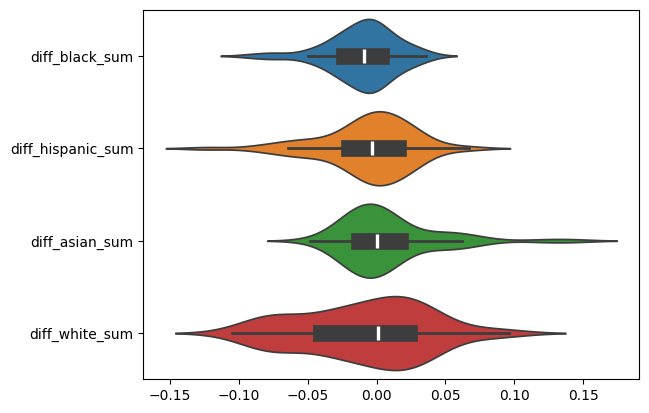

In [7]:
# make a seaborn violin plot of each of the diff columns
import seaborn as sns

# violin plot each column graphed side by side 
filtered_data = data[data["Year"] == 2024].filter(
    regex="_sum",
    axis=1,
)

filtered_data
sns.violinplot(data=filtered_data, inner_kws=dict(box_width=12, whis_width=2), orient="h") 
